# Example Notebook for exploring ERA5 global reanalysis daily data single day

Use of ERA5 data is free of charge, worldwide, non-exclusive, royalty-free and perpetual.\
All users of Copernicus Data and Products must provide clear and visible attribution to the Copernicus program.\
Neither the European Commission nor ECMWF is responsible for any use that may be made of the Copernicus information or data it contains.

In [1]:
%pip install beacon-api --upgrade
from beacon_api import * # Import the Beacon API client

Defaulting to user installation because normal site-packages is not writeable
  Using cached beacon_api-1.2.1-py3-none-any.whl.metadata (1.6 kB)
Using cached beacon_api-1.2.1-py3-none-any.whl (30 kB)
  Attempting uninstall: beacon-api
    Found existing installation: beacon-api 1.1.3
    Uninstalling beacon-api-1.1.3:
      Successfully uninstalled beacon-api-1.1.3
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\robin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Connect to the Beacon API instance for ERA5 data.

In [2]:
client = Client("https://beacon-era5.maris.nl")

Connected to: https://beacon-era5.maris.nl/ server successfully
Beacon Version: 1.5.2


Get the daily single levels collection

In [5]:
daily_single_levels_collections = client.list_tables()['daily_single_levels']

In [6]:
available_columns = daily_single_levels_collections.get_table_schema()
list(available_columns)[:50] # Display first 50 available columns

[pyarrow.Field<latitude.units: string>,
 pyarrow.Field<latitude.standard_name: string>,
 pyarrow.Field<latitude.long_name: string>,
 pyarrow.Field<latitude.stored_direction: string>,
 pyarrow.Field<latitude: double>,
 pyarrow.Field<longitude.units: string>,
 pyarrow.Field<longitude.standard_name: string>,
 pyarrow.Field<longitude.long_name: string>,
 pyarrow.Field<longitude: double>,
 pyarrow.Field<msl.GRIB_paramId: double>,
 pyarrow.Field<msl.GRIB_dataType: string>,
 pyarrow.Field<msl.GRIB_numberOfPoints: double>,
 pyarrow.Field<msl.GRIB_typeOfLevel: string>,
 pyarrow.Field<msl.GRIB_stepUnits: double>,
 pyarrow.Field<msl.GRIB_stepType: string>,
 pyarrow.Field<msl.GRIB_gridType: string>,
 pyarrow.Field<msl.GRIB_uvRelativeToGrid: double>,
 pyarrow.Field<msl.GRIB_NV: double>,
 pyarrow.Field<msl.GRIB_Nx: double>,
 pyarrow.Field<msl.GRIB_Ny: double>,
 pyarrow.Field<msl.GRIB_cfName: string>,
 pyarrow.Field<msl.GRIB_cfVarName: string>,
 pyarrow.Field<msl.GRIB_gridDefinitionDescription: strin

In [8]:
# Here we build the query step by step. First we select the columns we want to retrieve, then we add the filters and finally we specify the output format.
query_builder = daily_single_levels_collections.query()

query_builder.add_select_column("longitude") 
query_builder.add_select_column("latitude") 
query_builder.add_select_column("valid_time")
query_builder.add_select_column("t2m") # Other variables are available, you can check the list of available columns above and select the ones you are interested in.

## Add the filters
query_builder.add_range_filter("valid_time", "2025-01-01T00:00:00", "2025-01-01T00:00:00")  # You can adjust the date range as needed. The format is ISO 8601.

df = query_builder.to_pandas_dataframe()
df

Creating JSONQuery with from: FromTable(table='daily_single_levels')
Running query: {"output": {"format": "parquet"}, "select": [{"column": "longitude", "alias": null}, {"column": "latitude", "alias": null}, {"column": "valid_time", "alias": null}, {"column": "t2m", "alias": null}], "filters": [{"column": "valid_time", "gt_eq": "2025-01-01T00:00:00", "lt_eq": "2025-01-01T00:00:00"}], "distinct": null, "sort_by": null, "limit": null, "offset": null, "from": "daily_single_levels"}


,longitude,latitude,valid_time,t2m
0,0.00,90.0,2025-01-01,247.461929
1,0.25,90.0,2025-01-01,247.461929
2,0.50,90.0,2025-01-01,247.461929
3,0.75,90.0,2025-01-01,247.461929
4,1.00,90.0,2025-01-01,247.461929
...,...,...,...,...
1038235,358.75,-90.0,2025-01-01,244.823349
1038236,359.00,-90.0,2025-01-01,244.823349
1038237,359.25,-90.0,2025-01-01,244.823349
1038238,359.50,-90.0,2025-01-01,244.823349


It is also possible to get it as an xarray dataset, which is more convenient for working with gridded data. You can use the `to_xarray_dataset()` method instead of `to_pandas_dataframe()`.

In [12]:
# Here we build the query step by step. First we select the columns we want to retrieve, then we add the filters and finally we specify the output format.
query_builder = daily_single_levels_collections.query()

query_builder.add_select_column("longitude") 
query_builder.add_select_column("latitude") 
query_builder.add_select_column("valid_time")
query_builder.add_select_column("t2m") # Other variables are available, you can check the list of available columns above and select the ones you are interested in.

## Add the filters
query_builder.add_range_filter("valid_time", "2025-01-01T00:00:00", "2025-01-01T00:00:00")  # You can adjust the date range as needed. The format is ISO 8601.

ds = query_builder.to_xarray_dataset(dimension_columns=["valid_time", "latitude", "longitude"])
ds

Creating JSONQuery with from: FromTable(table='daily_single_levels')
Running query: {"output": {"format": {"nd_netcdf": {"dimension_columns": ["valid_time", "latitude", "longitude"]}}}, "select": [{"column": "longitude", "alias": null}, {"column": "latitude", "alias": null}, {"column": "valid_time", "alias": null}, {"column": "t2m", "alias": null}], "filters": [{"column": "valid_time", "gt_eq": "2025-01-01T00:00:00", "lt_eq": "2025-01-01T00:00:00"}], "distinct": null, "sort_by": null, "limit": null, "offset": null, "from": "daily_single_levels"}


<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 1, latitude: 721, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2025-01-01
  * latitude    (latitude) float64 6kB -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    t2m         (valid_time, latitude, longitude) float32 4MB ...

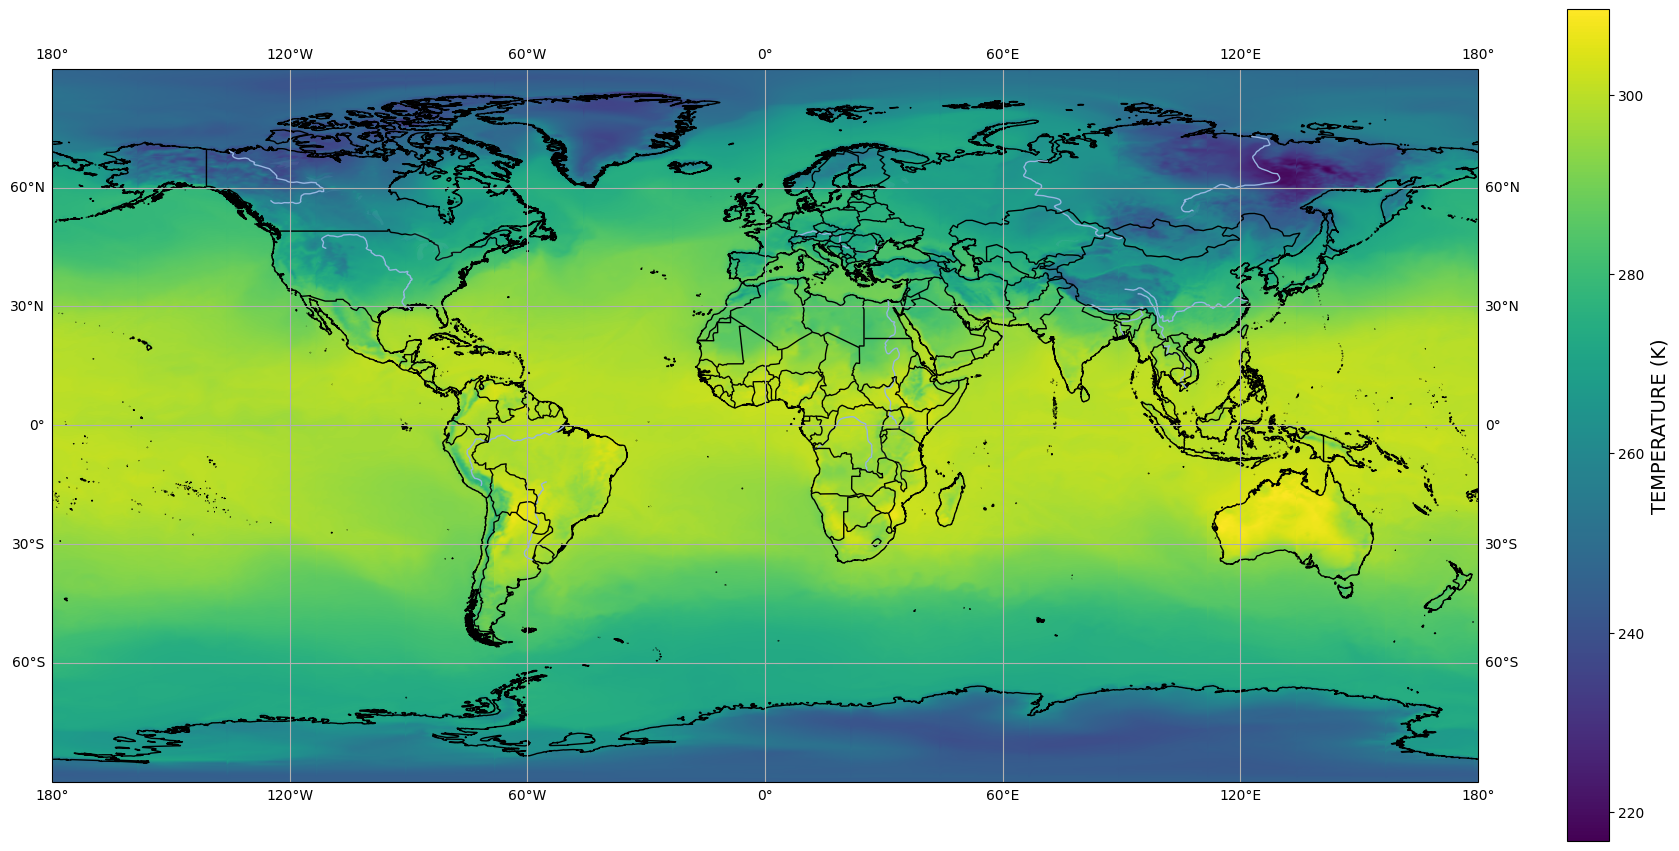

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(23, 18))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # (west, east, south, north)

ax.coastlines(resolution="10m")
ax.gridlines(draw_labels=True)

sc = ax.scatter(df["longitude"], df["latitude"], c=df['t2m'], cmap="viridis", s=15, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     
ax.add_feature(cfeature.BORDERS)   
ax.add_feature(cfeature.LAKES, alpha=0.1) 

cbar = plt.colorbar(sc, ax=ax, orientation="vertical", shrink=0.6, label="Value Set 1")
cbar.set_label(f"TEMPERATURE (K)", fontsize=14)

plt.show()